# Mobile Price Classification
### Fang Li
### Instructor - Dr. Uma Gajendragadkar
### Problem - Design and develop Machine learning model to predict mobile price range (what it does)
### Machine Learning algorithm: Decision Tree Classification
### Machine Learning Libraries Used: 
pandas, numpy, matplotlib.pyplot, matplotlib.colors.ListedColormap, seaborn, sklearn.preprocessing.StandardScaler, sklearn.model_selection.train_test_split, sklearn.tree.DecisionTreeClassifier, sklearn.metrics.accuracy_score, sklearn.metrics.classification_report, sklearn.metrics.precision_recall_curve, sklearn.metrics.confusion_matrix, sklearn.metrics.f1_score, sklearn, sklearn.tree
### Dataset - Mobile dataset
### dataset link:https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data
There are two csv data files, one with all the features and target variable(price range), another one with features and no target variable. The train.csv dataset consists of 2000 entries & 21 columns, the test.csv dataset consists of 1000 entries & 21 columns

 0   battery_power: Total energy a battery can store in one time measured in mAh  
 1   blue: Has bluetooth or not         
 2   clock_speed: speed at which microprocessor executes instructions  
 3   dual_sim: Has dual sim support or not   
 4   fc: Front Camera mega pixels         
 5   four_g: Has 4G or not   
 6   int_memory: Internal Memory in Gigabytes  
 7   m_dep: Mobile Depth in cm   
 8   mobile_wt: Weight of mobile phone  
 9   n_cores: Number of cores of processor      
 10  pc: Primary Camera mega pixels        
 11  px_height: Pixel Resolution Height   
 12  px_width: Pixel Resolution Width      
 13  ram: Random Access Memory in Mega Bytes         
 14  sc_h: Screen Height of mobile in cm            
 15  sc_w: Screen Width of mobile in cm       
 16  talk_time: longest time that a single battery charge will last when you are   
 17  three_g: Has 3G or not   
 18  touch_screen: Has touch screen or not  
 19  wifi: Has wifi or not        
 20  price_range:This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import tree

# Import and Explore data

In [3]:
# Read training dataset
df_train = pd.read_csv('train.csv')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# Read tseting dataset
df_test = pd.read_csv('test.csv')
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [7]:
# check the info, found there are no object data type that need to be converted
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# describe the training data
# help to find outliers, check distributions,feature spread
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


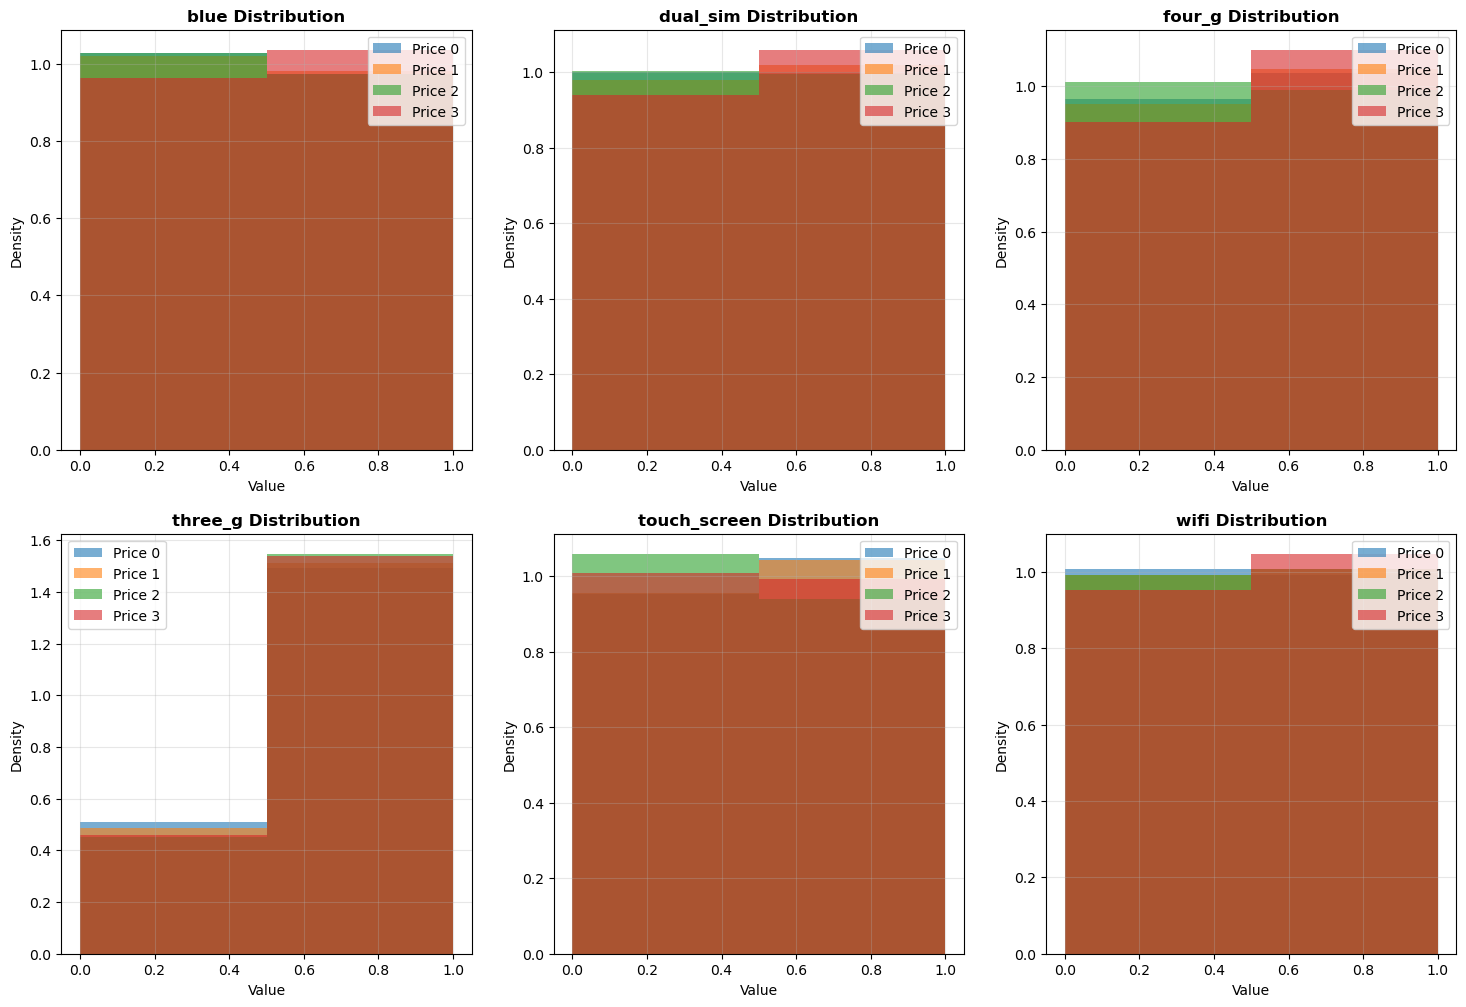

In [11]:
# Compare histograms across price ranges
# plots show very similar distributions across all price ranges (lots of overlaps across different price rages)
# Theree_g distribution shows most of the mobiles have this feature
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# make it easy to loop through using .ravel()
axes = axes.ravel()
for i, feature in enumerate(binary_features):
    # create histogram for different price range
    for price_range in [0, 1, 2, 3]:
        # get the data only includes rows for current price range, and select the current binary feature column
        data = df_train[df_train['price_range'] == price_range][feature]
        axes[i].hist(data, alpha=0.6, bins=[0, 0.5, 1], 
                    label=f'Price {price_range}', density=True)
    # create title, label and legend for each distribution chart
    axes[i].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(alpha=0.3)

In [13]:
# data cleaning
# drop the columns that won't affect the price range that much as plots shown above
df_train = df_train.drop(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], axis=1)
df_train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


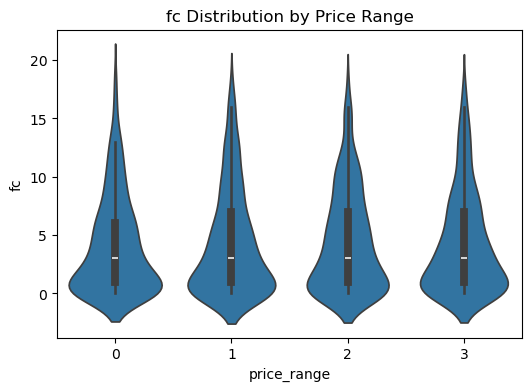

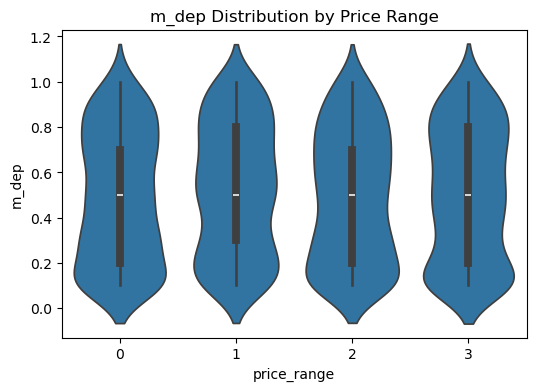

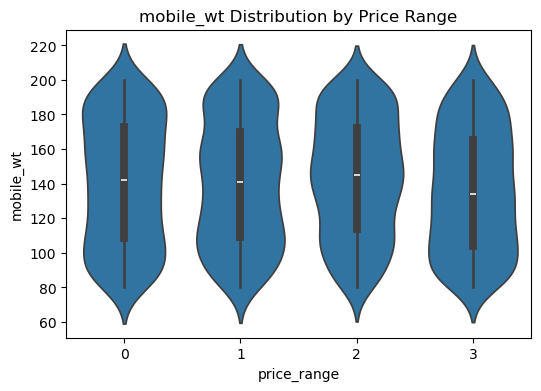

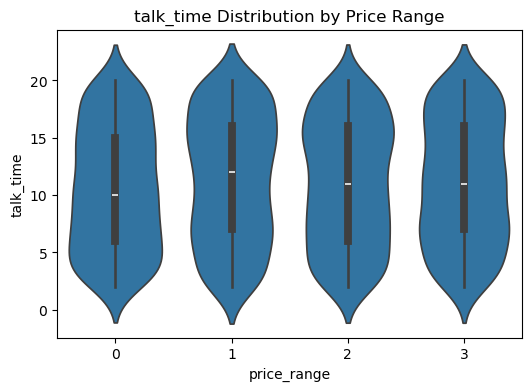

In [15]:
# violins for these features are very similar in shape, spread, and median across price ranges
features_check = ['fc', 'm_dep', 'mobile_wt', 'talk_time']
for col in features_check:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='price_range', y=col, data=df_train)
    plt.title(f'{col} Distribution by Price Range')
    plt.show()

In [17]:
# data cleaning
# drop these columns that don't change much across price ranges
df_train = df_train.drop(['fc', 'm_dep', 'mobile_wt', 'talk_time'], axis=1)

In [19]:
# check the target variable
df_train['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

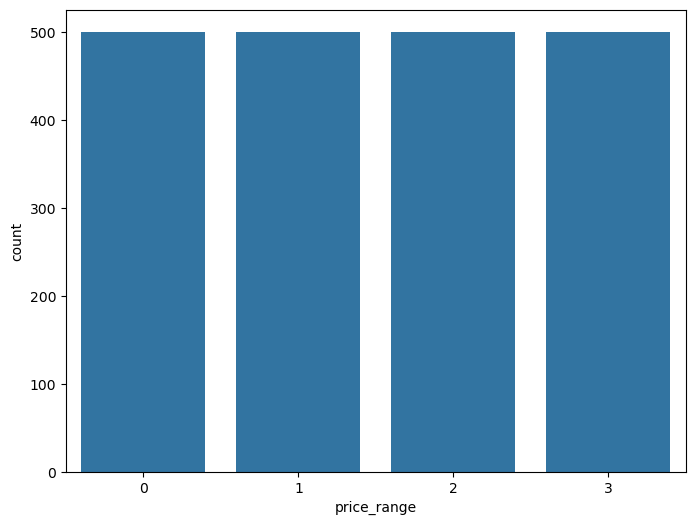

In [21]:
# count plot for price_range
# the data entries for different price ranges is well balanced
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='price_range')
plt.show()

#### 'price_range' is target variable and these features are used by my project by now(I dropped some more latter):
'battery_power', 'clock_speed', 'int_memory', 'n_cores', 'pc', 'px_height', 'px_width',	'ram', 'sc_h', 'sc_w', 'price_range'

In [23]:
# show first five rows of the data with features that are kept for my analysis
df_train.head()

,battery_power,clock_speed,int_memory,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,2.2,7,2,2,20,756,2549,9,7,1
1,1021,0.5,53,3,6,905,1988,2631,17,3,2
2,563,0.5,41,5,6,1263,1716,2603,11,2,2
3,615,2.5,10,6,9,1216,1786,2769,16,8,2
4,1821,1.2,44,2,14,1208,1212,1411,8,2,1


# Data Preprocessing

In [25]:
# Data Cleaning
# drop duplicates in the dataset
df_train.drop_duplicates()
# check the missing values
df_train.isnull().sum()

battery_power    0
clock_speed      0
int_memory       0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
price_range      0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

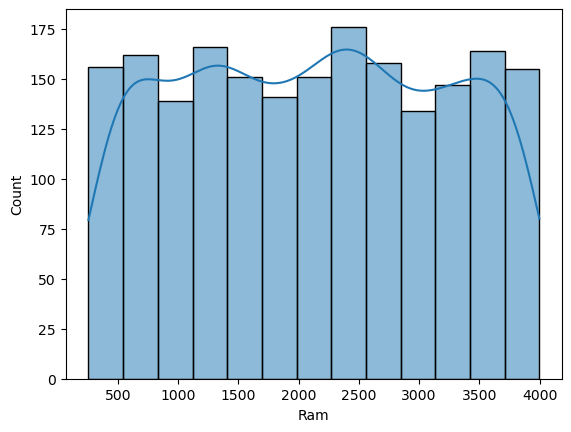

In [27]:
# check ram distribution
sns.histplot(data=df_train, x='ram', kde=True)
plt.xlabel('Ram')
plt.show

## Correlation matrix

In [29]:
# no need for the encoding for price_range, it is already showed by numbers
# Correlation matrix
# ram has 0.917, indicating strong positive correlation, which makes it a strong feature for our prediction
df_train.corr()

,battery_power,clock_speed,int_memory,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
battery_power,1.000000,0.011482,-0.004004,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.200723
clock_speed,0.011482,1.000000,0.006545,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.006606
int_memory,-0.004004,0.006545,1.000000,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,0.044435
n_cores,-0.029727,-0.005724,-0.028310,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.004399
pc,0.031441,-0.005245,-0.033273,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.033599
px_height,0.014901,-0.014523,0.010441,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,0.148858
px_width,-0.008402,-0.009476,-0.008335,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.165818
ram,-0.000653,0.003443,0.032813,0.004868,0.028984,-0.020352,0.004105,1.000000,0.015996,0.035576,0.917046
sc_h,-0.029959,-0.029078,0.037771,-0.000315,0.004938,0.059615,0.021599,0.015996,1.000000,0.506144,0.022986
sc_w,-0.021421,-0.007378,0.011731,0.025826,-0.023819,0.043038,0.034699,0.035576,0.506144,1.000000,0.038711


<Axes: >

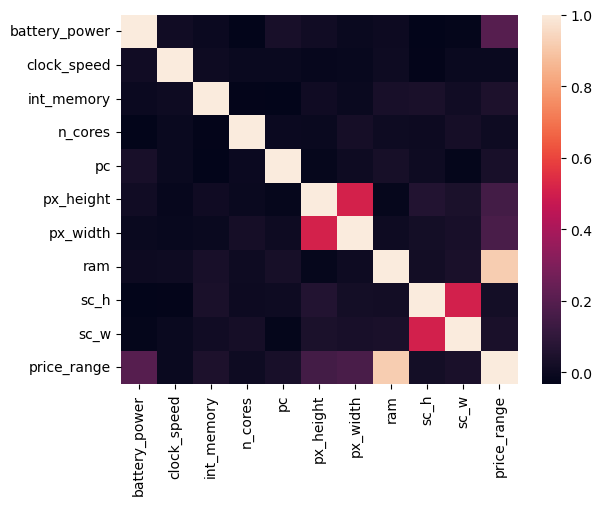

In [31]:
sns.heatmap(df_train.corr())

## Relationship

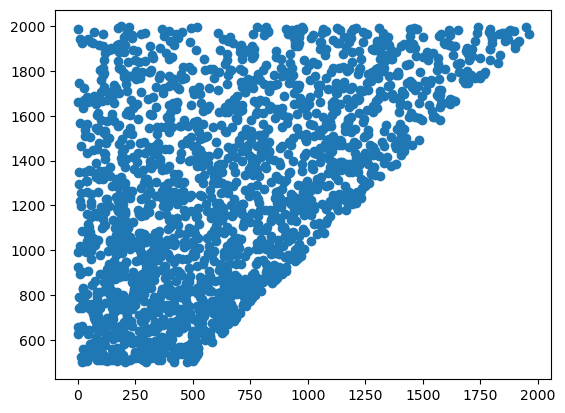

In [35]:
# Relationship between ram and battery_power
# This plot and the corelation table above shows that we could keep both of these two features
# they have a positive relationship(0.51) with each other and a meaningful relationship with price range
plt.scatter(df_train['px_height'], df_train['px_width'])

## Drop insignificant data

In [37]:
# Drop columns: clock_speed, int_memory, n_cores, pc, sc_h, sc_w
df_train.drop(columns=['clock_speed', 'int_memory', 'n_cores', 'pc', 'sc_h', 'sc_w'], inplace=True)
df_train.head()

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1


# Split data

## Independent/Dependent variables

In [39]:
# Split data into independent/dependent variables
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

## Train/Test sets

In [41]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

# Feature scaling

In [43]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model

In [45]:
# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=10, min_samples_leaf=5)
classifier.fit(X_train, y_train);

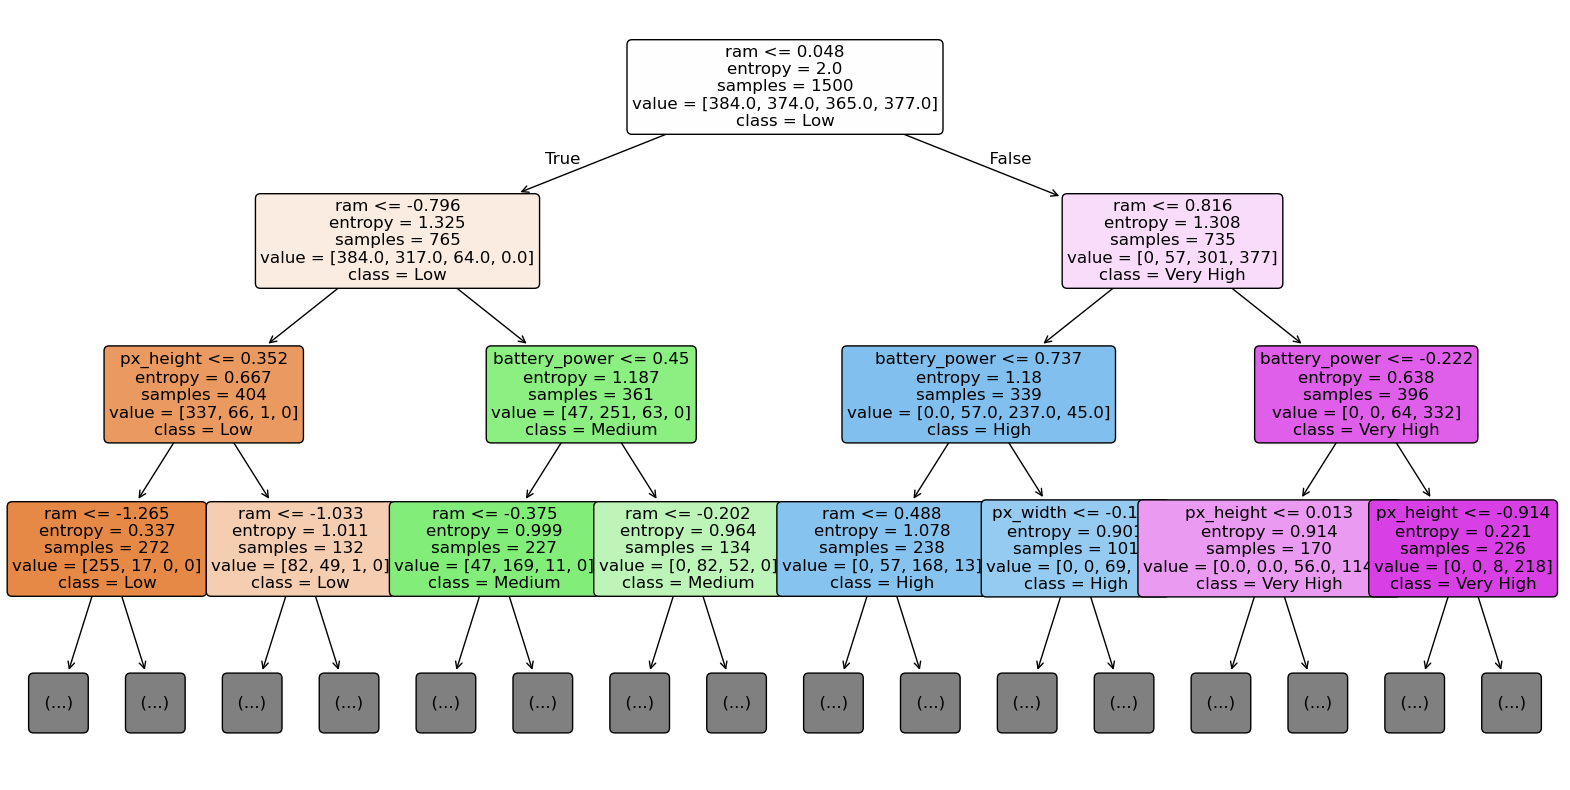

In [47]:
# Display the tree
feature_names = ['battery_power', 'px_height', 'px_width', 'ram']
plt.figure(figsize=(20, 10))
# show top three levels
tree.plot_tree(classifier, max_depth=3,
               feature_names=feature_names,
               class_names=['Low', 'Medium', 'High', 'Very High'],
               filled=True,
               rounded=True,
               fontsize=12);

# Predict result / Score model

In [49]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [1 0]
 [1 1]
 [0 1]
 [2 2]
 [1 2]
 [1 0]
 [2 2]
 [2 2]
 [3 3]
 [0 0]
 [3 3]
 [1 1]
 [1 1]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 1]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [3 2]
 [0 0]
 [3 3]
 [3 3]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [3 3]
 [2 1]
 [3 3]
 [1 1]
 [3 3]
 [3 3]
 [1 1]
 [0 0]
 [2 2]
 [1 0]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [1 0]
 [1 1]
 [1 1]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [1 2]
 [2 3]
 [3 3]
 [0 0]
 [2 3]
 [3 3]
 [3 3]
 [3 3]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [3 3]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [3 3]
 [3 3]
 [0 0]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [3 3]

# Evaluate model

## Accuracy

In [51]:
# Accuracy
accuracy_score(y_test, y_pred)

0.884

## Classification report

In [53]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       116
           1       0.84      0.84      0.84       126
           2       0.87      0.83      0.85       135
           3       0.91      0.94      0.93       123

    accuracy                           0.88       500
   macro avg       0.88      0.89      0.89       500
weighted avg       0.88      0.88      0.88       500



## F1 score

In [55]:
# F1 score that show my model has overall great performance across all price ranges
# Macro averaging calculates the F1 score for each class separately, then takes the unweighted average
print(f"F1 Score : {f1_score(y_test, y_pred, average='macro')}")

F1 Score : 0.8852079032079032


## Confusion matrix

<Axes: >

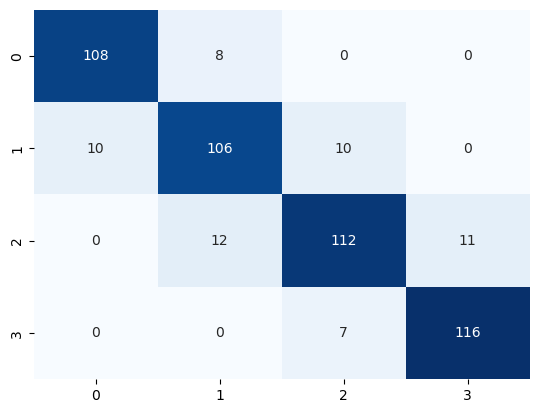

In [57]:
# Confusion matrix
# 108: Phones that were actually class 0 AND predicted as class 0
# 8: Phones that were actually class 0 BUT predicted as class 1
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Check example
## try on new and unseen data in test.csv with only the features and no price_range column

In [59]:
# drop id column from df_test
x_test = df_test[['battery_power', 'px_height', 'px_width', 'ram']]
x_test.head()

,battery_power,px_height,px_width,ram
0,1043,226,1412,3476
1,841,746,857,3895
2,1807,1270,1366,2396
3,1546,295,1752,3893
4,1434,749,810,1773


In [61]:
# use the same scaler to scale
x_test_scaled = sc.transform(x_test.values)

In [63]:
# predict the price range for test data
y_test_pred = classifier.predict(x_test_scaled)
y_test_pred[:10]

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0], dtype=int64)